# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

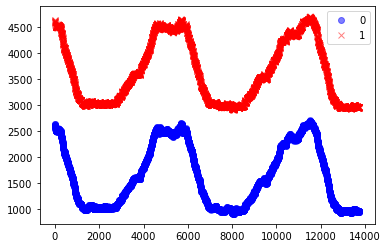

In [2]:
import pandas as pd

data = pd.read_csv("../../data/tmp.csv")
datacorrect = np.array(pd.read_csv("../../data/tmp2.csv")).flatten()

dataarray = np.array(data)
dataiscorrect = data[datacorrect==0]
dataisincorrect = data[datacorrect==1]

plt.plot(dataiscorrect["onlineplayers"], 'ob', alpha=0.5)
plt.plot(dataisincorrect["onlineplayers"], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, datacorrect,
                                                    test_size=0.3,
                                                    random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
301/301 [==============================] - 1s 897us/step - loss: 30.7357 - accuracy: 0.6299
Epoch 2/100
301/301 [==============================] - 0s 807us/step - loss: 21.5729 - accuracy: 0.6443
Epoch 3/100
301/301 [==============================] - 0s 823us/step - loss: 12.9864 - accuracy: 0.6638
Epoch 4/100
301/301 [==============================] - 0s 802us/step - loss: 12.8059 - accuracy: 0.6705
Epoch 5/100
301/301 [==============================] - 0s 760us/step - loss: 13.8802 - accuracy: 0.6798
Epoch 6/100
301/301 [==============================] - 0s 809us/step - loss: 9.6449 - accuracy: 0.7078
Epoch 7/100
301/301 [==============================] - 0s 703us/step - loss: 10.5159 - accuracy: 0.7092
Epoch 8/100
301/301 [==============================] - 0s 707us/step - loss: 9.9584 - accuracy: 0.7182
Epoch 9/100
301/301 [==============================] - 0s 717us/step - loss: 8.4979 - accuracy: 0.7456
Epoch 10/100
301/301 [==============================] - 0s 751us/st

In [8]:
results = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 625us/step - loss: 4.5150e-06 - accuracy: 1.0000


In [9]:
results

[4.5149572542868555e-06, 1.0]

In [10]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	1.000


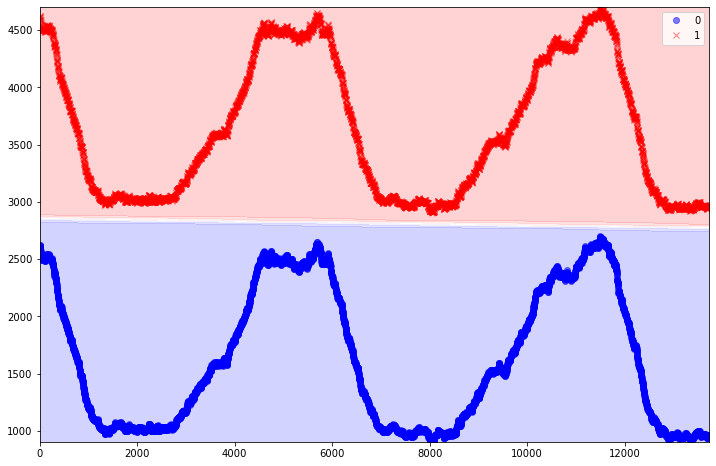

In [11]:
def plot_decision_boundary(model):
    amin, bmin = data.min(axis=0) - 0.1
    amax, bmax = data.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(dataiscorrect["onlineplayers"], 'ob', alpha=0.5)
    plt.plot(dataisincorrect["onlineplayers"], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model)